# Group Project: Crime Rate Exploration

Scientific Question:  How are the number of arrests correlated to the number of employed police officers?   

# Look at National trends in arrests for all crimes

In [342]:
#import all necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Get FBI API Key
API_KEY = api_keys.fbi_api_key

#Pull data from the website on trends for all crimes

# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#Create a list of variables that we want to explore data for. In this case male and females
variable = 'all'
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
crime_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    desired_endpoint = "api/arrest/states/offense/" + i + '/' + variable + '/' + since + '/' + until
    req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
    new = pd.DataFrame(req["data"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new['State'] = i
    #Append the data from each request to the dataframe
    crime_data = crime_data.append(new)    

In [343]:
crime_data.head()

,value,data_year,month_num,key,State
0,2678,2010,0,Aggravated Assault,AL
1,4,2011,0,Aggravated Assault,AL
2,7,2012,0,Aggravated Assault,AL
3,10,2013,0,Aggravated Assault,AL
4,40,2014,0,Aggravated Assault,AL


In [344]:
#group data by year
crime_data_grouped_by_year = crime_data.groupby("data_year")
#find the sum of the values (arrested crimes) per year
sum_arrested_per_year = crime_data_grouped_by_year.sum()
sum_arrested_per_year.head()

,value,month_num
data_year,,
2010,10602026,0
2011,10012922,0
2012,9979508,0
2013,9613185,0
2014,9037194,0


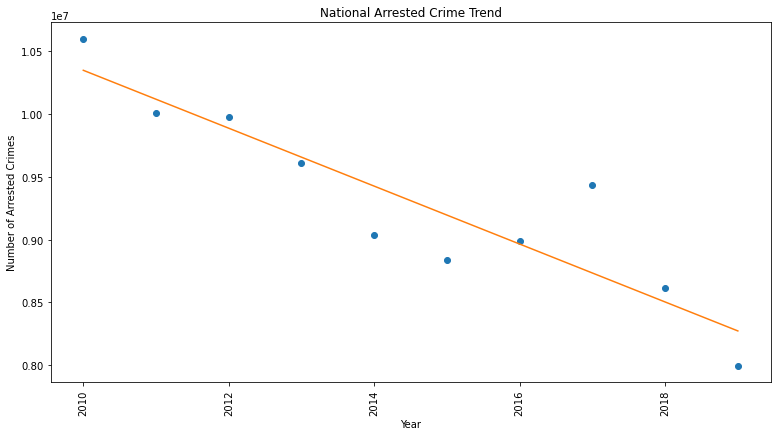

In [311]:
#Plot crime arrest data trend over the last 10 years
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_arrested_per_year.index
y=sum_arrested_per_year['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('National Arrested Crime Trend')
ax.set_ylabel("Number of Arrested Crimes")
ax.set_xlabel("Year")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# Look at National Trends in Number of Officers

In [314]:
#Pull data from the website on employment of officers by state
#https://api.usa.gov/crime/fbi/sapi/api/police-employment/states/MO/2010/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv


# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
employment_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    desired_endpoint = "api/police-employment/states/" + i + '/' + since + '/' + until
    req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
    new = pd.DataFrame(req["results"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new['State'] = i
    #Append the data from each request to the dataframe
    employment_data = employment_data.append(new)    

In [315]:
employment_data.head()

,data_year,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,state_name,state_abbr,agency_count_pe_submitting,csv_header,pe_ct_per_1000,State
0,2010,5424,3354,808,4162,2070,10434,12504,4792630,16666,2,Alabama,AL,365,None,3.48,AL
1,2011,5701,3587,801,4388,2114,10668,12782,4815348,17170,2,Alabama,AL,378,None,3.57,AL
2,2012,5806,3584,809,4393,2222,10400,12622,4834334,17015,2,Alabama,AL,385,None,3.52,AL
3,2013,5818,3684,805,4489,2134,10681,12815,4845981,17304,2,Alabama,AL,379,None,3.57,AL
4,2014,5655,3591,829,4420,2064,10613,12677,4861676,17097,2,Alabama,AL,372,None,3.52,AL


In [320]:
#Group data by year
employment_data_grouped_by_year = employment_data.groupby("data_year")
#find the sum of the values (total_pe_ct) per year
sum_employment_per_year = employment_data_grouped_by_year.sum()
sum_employment_per_year.head()

,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,agency_count_pe_submitting,pe_ct_per_1000
data_year,,,,,,,,,,,,
2010,329066,199803,88139,287942,129263,664497,793760,313562507,1081702,1466,16449,162.87
2011,329173,199657,98019,297676,129516,663545,793061,316558322,1090737,1466,16466,166.62
2012,324404,194626,86878,281504,129778,656673,786451,319057545,1067955,1466,16610,159.27
2013,320024,193776,85341,279117,126248,656741,782989,321306227,1062106,1466,16652,156.85
2014,325136,194201,86793,280994,130935,656210,787145,324076206,1068139,1466,16619,158.35


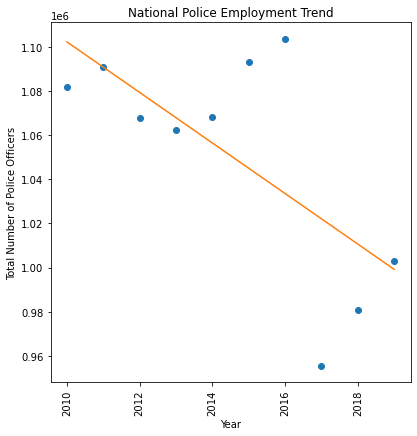

In [336]:
#Plot crime arrest data trend over the last 10 years
#Plot crime arrest data trend over the last 10 years
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_employment_per_year.index
y=sum_employment_per_year['total_pe_ct']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('National Police Employment Trend')
ax.set_ylabel("Total Number of Police Officers")
ax.set_xlabel("Year")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,2)
plt.show()

# Find National Correlation Between Number of Officers and Arrests

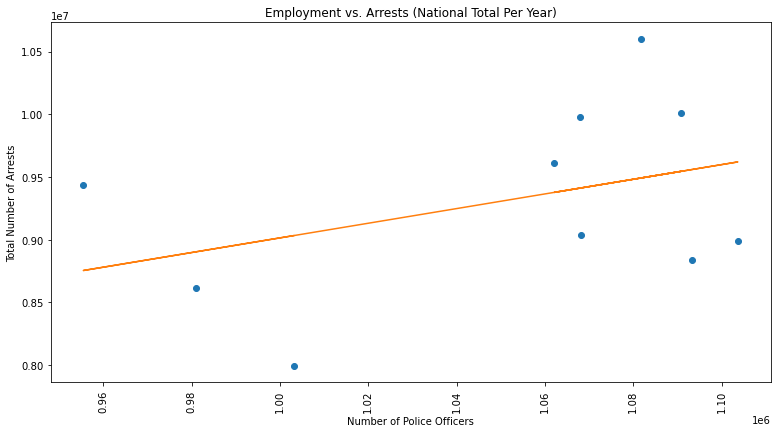

In [341]:
#Find correlation between number of officers and total number of arrests. 

#graph scatter plot of total officers per year vs. total arrests per year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_employment_per_year['total_pe_ct']
y=sum_arrested_per_year['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('Employment vs. Arrests (National Total Per Year)')
ax.set_ylabel("Total Number of Arrests")
ax.set_xlabel("Number of Police Officers")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [347]:
#Find the correlation between the two
corr_employ_vs_arrests = sum_employment_per_year['total_pe_ct'].corr(sum_arrested_per_year['value'], method='pearson')
print(corr_employ_vs_arrests)

0.39254682119903445


In [364]:
#There is a weak positive correlation between the total number of national police officers per year and the total number of national arrests per year.

#In order to get more data points, I'm going to now look at the break down by states instead of national total.
crime_data_grouped_by_state_and_year= crime_data.groupby(['State', 'data_year']).sum()
crime_data_grouped_by_state_and_year.head(-1)


value  month_num
State data_year                  
AK    2010       41972          0
      2011       40214          0
      2012       29691          0
      2013       29569          0
      2014       25940          0
...                ...        ...
WY    2014       28874          0
      2015       29139          0
      2016       28374          0
      2017       28004          0
      2018       28385          0

[492 rows x 2 columns]

In [363]:
employment_data_grouped_by_state_and_year = employment_data.groupby(['State', 'data_year']).sum()
employment_data_grouped_by_state_and_year.head()

civilian_ct  female_civilian_ct  female_officer_ct  \
State data_year                                                       
AK    2010               730                 474                106   
      2011               710                 472                109   
      2012               690                 453                109   
      2013               634                 443                113   
      2014               691                 456                116   

                 female_total_ct  male_civilian_ct  male_officer_ct  \
State data_year                                                       
AK    2010                   580               256             1152   
      2011                   581               238             1215   
      2012                   562               237             1221   
      2013                   556               191             1248   
      2014                   572               235             1202   

                 male_total_ct  population  total_pe_ct  state_id  \
State data_year                                                     
AK    2010                1408      711456         1988         1   
      2011                1453      725910         2034         1   
      2012                1458      735190         2020         1   
      2013                1439      739005         1995         1   
      2014                1437      740644         2009         1   

                 agency_count_pe_submitting  pe_ct_per_1000  
State data_year                                              
AK    2010                               36            2.79  
      2011                               35            2.80  
      2012                               35            2.75  
      2013                               33            2.70  
      2014                               33            2.71

In [409]:
#Find correlation between pe_ct_per_1000 and total arrests
corr_total_pe_vs_arrests = crime_data_grouped_by_state_and_year['value'].corr(employment_data_grouped_by_state_and_year['total_pe_ct'], method='pearson')
print(corr_total_pe_vs_arrests)
#Look at length of each dataframe
print(len(employment_data_grouped_by_state_and_year['total_pe_ct']))
print(len(crime_data_grouped_by_state_and_year['value']))
#print(crime_data_grouped_by_state_and_year.loc['FL'])
#print(employment_data_grouped_by_state_and_year.loc['FL'])
#Florida is missing crime data from 2010 to 2016
#Remove data from employment dataframe for florida from 2010 to 2016 so that each dataframe has a matching number of elements for correlation
new_grouped_employment_df=employment_data_grouped_by_state_and_year.drop(index='FL',level=0)
new_grouped_crime_df=crime_data_grouped_by_state_and_year.drop(index='FL',level=0)

0.8658015192016927
500
493


In [414]:
#Calculate Coefficient Now that lengths of dataframes match
new_corr_total_pe_vs_arrests = new_grouped_crime_df['value'].corr(new_grouped_employment_df['total_pe_ct'], method='pearson')
print(new_corr_total_pe_vs_arrests)

0.8716575807715448


In [412]:
#Look at length of each dataframe
print(len(new_grouped_employment_df['total_pe_ct']))
print(len(new_grouped_crime_df['value']))

#Merge dataframes
#get columns that we want from crime_data
#crime_data.head()
#new_employment_data = employment_data['data_year','State','total_pe_ct']
#total_df = pd.concat(crime_data['value'],employment_data['total_pe_ct'])
#total_df.head()

490
490


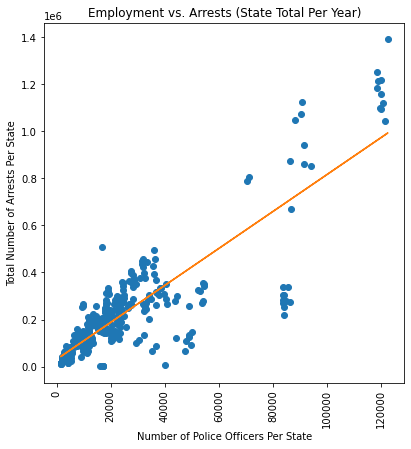

In [426]:
# If you look at the correlation between total count of officers and total arrests made and you break it up into states and year, the correlation is strong. 
# Graph it as a scatter plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=new_grouped_employment_df['total_pe_ct']
y=new_grouped_crime_df['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#print(new_grouped_crime_df.index)
#colors = {'2010':'red','2011':'orangered','2012':'gold','2013':'yellow','2014':'greenyellow','2015':'green','2016':'cyan','2017':'blue','2018':'indigo','2019':'violet'}
#ax.scatter(x,y, c=new_grouped_crime_df['index'].map(colors))
#ax.scatter(x,y)
ax.set_title('Employment vs. Arrests (State Total Per Year)')
ax.set_ylabel("Total Number of Arrests Per State")
ax.set_xlabel("Number of Police Officers Per State")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()


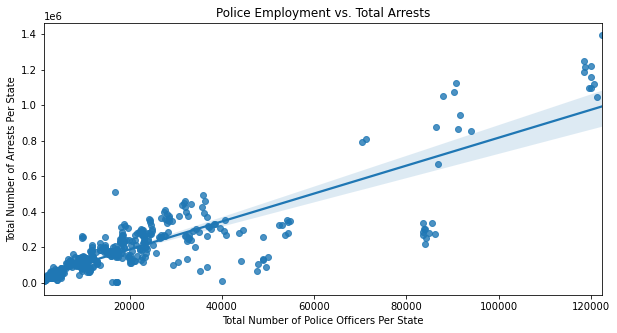

In [450]:
#try with seaborn
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['total_pe_ct'], y=new_grouped_crime_df['value'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression
#Add the x axis title 
#Add the y axis title

plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

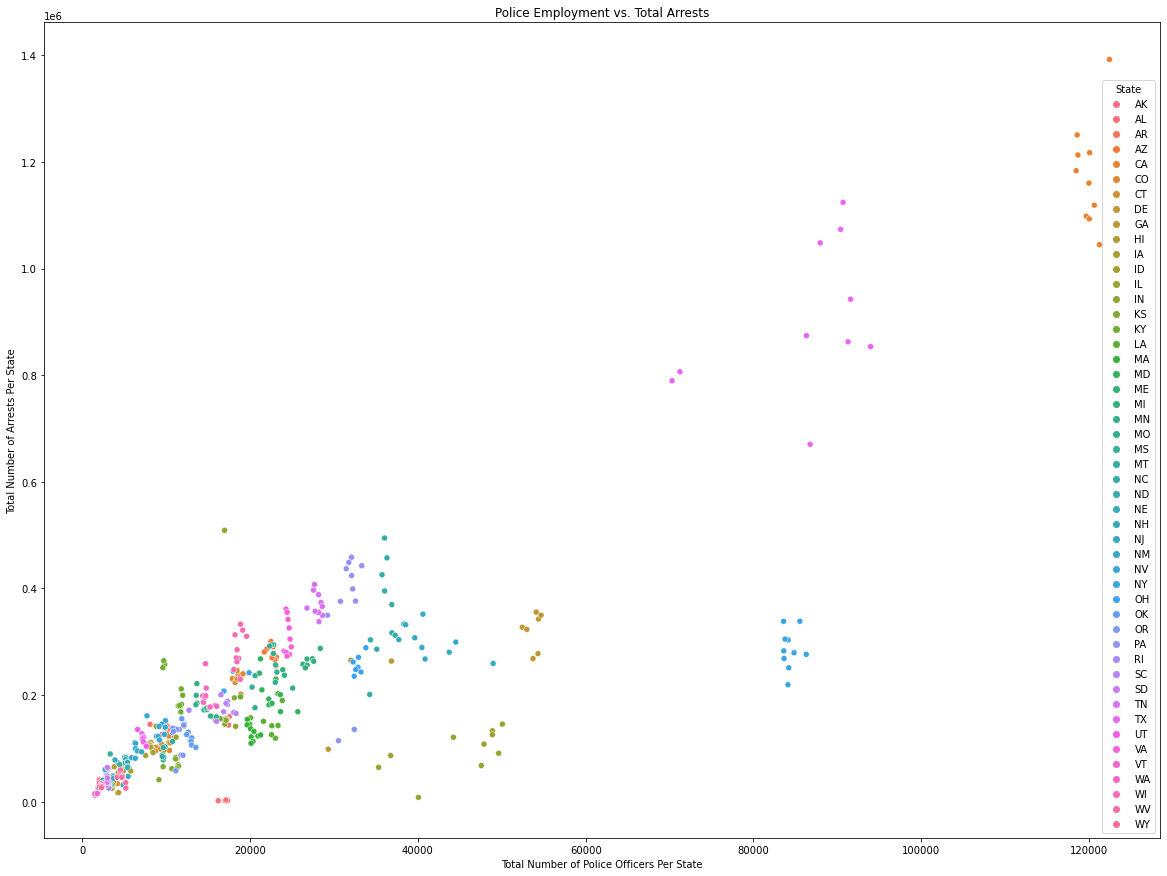

In [467]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=new_grouped_employment_df['total_pe_ct'], y=new_grouped_crime_df['value'], hue=new_grouped_crime_df.index.get_level_values("State"), legend='full')
plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

# Correlate Arrests Made With Number of Officers Per 1000 People

In [462]:
#Calculate Coefficient Now that lengths of dataframes match
new_corr_tot_pe_per_1000_vs_arrests = new_grouped_crime_df['value'].corr(new_grouped_employment_df['pe_ct_per_1000'], method='pearson')
print(new_corr_tot_pe_per_1000_vs_arrests)

0.15358910826691985


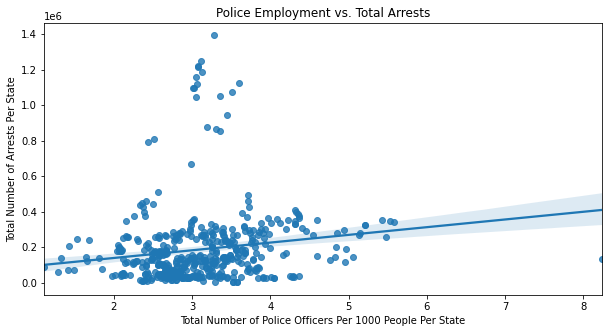

In [460]:
#try with seaborn to color code
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['pe_ct_per_1000'], y=new_grouped_crime_df['value'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression
#Add the x axis title 
#Add the y axis title

plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per 1000 People Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

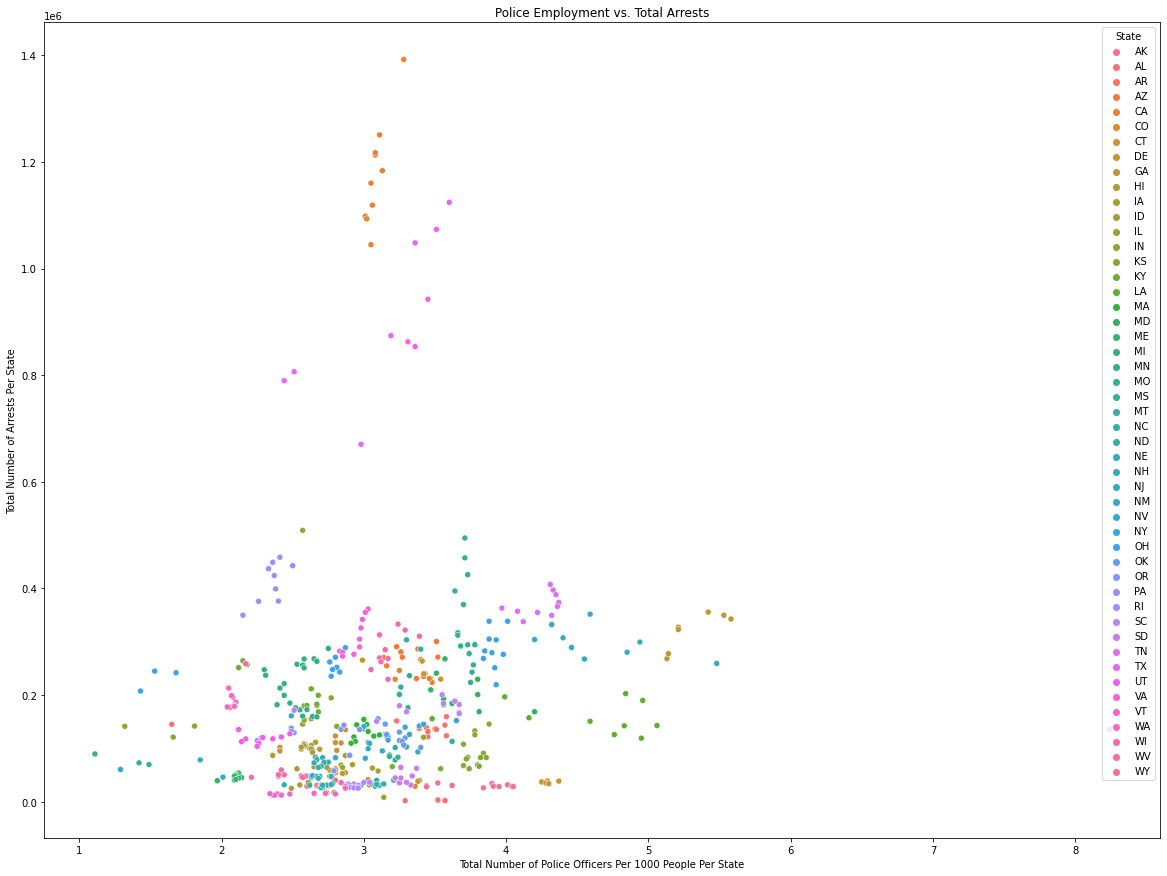

In [466]:
x=new_grouped_employment_df['pe_ct_per_1000']
y=new_grouped_crime_df['value']
plt.figure(figsize=(20,15))
sns.scatterplot(x=new_grouped_employment_df['pe_ct_per_1000'], y=new_grouped_crime_df['value'], hue=new_grouped_crime_df.index.get_level_values("State"), legend='full')
plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per 1000 People Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

# Correlate Number of Arrests Per State to Population


In [463]:
#Calculate Coefficient Now that lengths of dataframes match
new_corr_tot_pop_vs_arrests = new_grouped_crime_df['value'].corr(new_grouped_employment_df['population'], method='pearson')
print(new_corr_tot_pop_vs_arrests)

0.9007886842849476


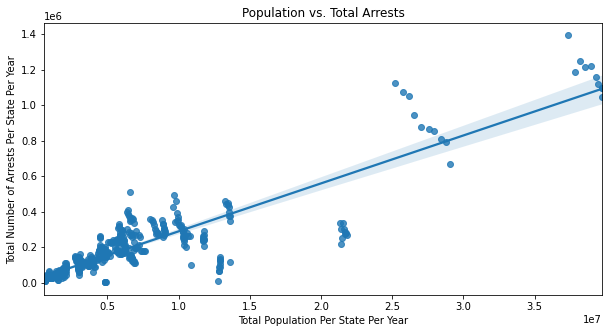

In [464]:
#Graph It
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['population'], y=new_grouped_crime_df['value'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression
#Add the x axis title 
#Add the y axis title

plt.title('Population vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Population Per State Per Year')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State Per Year')
plt.show()

# Summary of Findings 

We wanted to understand how the number of officers correlated to the number of arrests.  When looking at trends over a 10 year period (2010-2019), the number of arrests and the number of total employed police officers nationally have both been declining. When you look at the sum of number of arrests vs. the total number of officers for the entire nation over the 10 year period 2010-2019, the correlation was 0.39, so there was a small correlation between total number of police officers and total number of arrests. 

When we break up data into individual states, there is a strong correlation (0.87) between the total number of police officers per state and the total number of arrests per state.  However, this is likely due population of each state.  When a state has a larger population, then there are more arrests and more police officers. 

If we look at the correlation between the total number of arrests and number of police officers per 1000 people, we actually see a much smaller correlation (0.154). There is a 0.901 correlation, however, between population and number of arrests. This is showing that arrests is much more correlated to general population then the number of officers per 1000 people.  So, it seems that police forces have an adequate number of police officers, in general, to catch the amount the crime that is occuring.  